# Simulations numériques

In [1]:
import sys
sys.path.append(r'retraites')

In [2]:
from SimulateurRetraites import SimulateurRetraites
from SimulateurAnalyse import SimulateurAnalyse
import pylab as pl

## Hypothèses : conjoncture

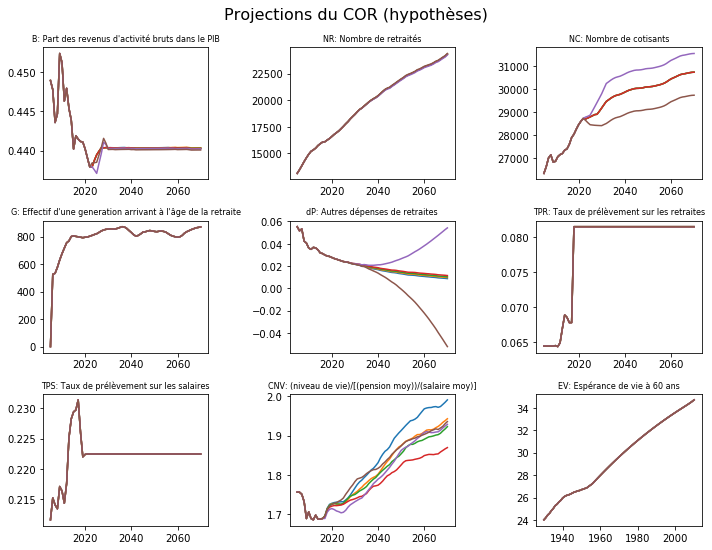

In [3]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
    
analyse = SimulateurAnalyse(simulateur, "fig/")
pl.figure(figsize=(10,8))
pl.suptitle(u"Projections du COR (hypothèses)",fontsize=16)
for c in range(9):
    pl.subplot(3,3,c+1)
    v,V = [ (simulateur.B,'B'), (simulateur.NR,'NR'), (simulateur.NC,'NC'), \
            (simulateur.G,'G'), (simulateur.dP,'dP'), (simulateur.TCR,'TPR'), 
            (simulateur.TCS,'TPS'), (simulateur.CNV,'CNV'), (simulateur.EV,'EV') ][c]
    analyse.graphique(v,V)
pl.tight_layout(rect=[0, 0.03, 1, 0.95])    

## Statu quo (COR)

Cette stratégie de pilotage est celle du COR en 2019. 

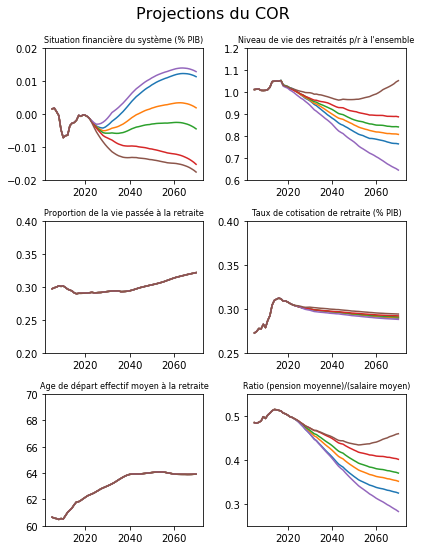

In [4]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
    
S,RNV,REV = simulateur.calcule_S_RNV_REV(simulateur.T,simulateur.P,simulateur.A)

pl.figure(figsize=(6,8))
pl.suptitle('Projections du COR',fontsize=16)
analyse = SimulateurAnalyse(simulateur, "fig/")
analyse.graphiques(simulateur.T,simulateur.P,simulateur.A, S, RNV,REV)

## Pilotage 1 : calcul à âge et niveau de vie défini

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau de vie par rapport à l'ensemble de la population, 
* le départ à un âge donné.


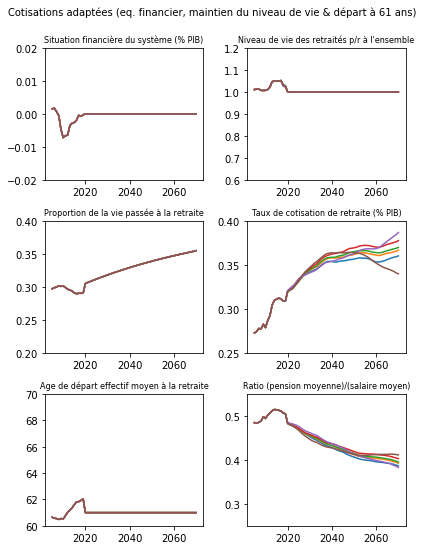

In [5]:
S = 0.0
age = 61
RNV = 1.0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
Ts,Ps,As = simulateur.calcule_Ts_Ps_As_fixant_As_RNV_S(age, RNV, S)
S,RNV,REV = simulateur.calcule_S_RNV_REV(Ts,Ps,As)

pl.figure(figsize=(6,8))
if age!=0:
    pl.suptitle( (u"Cotisations adaptées (eq. financier, maintien du niveau de vie & départ à %d ans)"%(age)),fontsize=10)
else:
    pl.suptitle(u"Cotisations adaptées (équilibre financier & maintien du niveau de vie)",fontsize=10)
        
analyse = SimulateurAnalyse(simulateur, "fig/")
analyse.graphiques(Ts,Ps,As, S,RNV,REV)

analyse.mysavefig("cotisations")

## Pilotage 2 : calcul à cotisations et pensions définies

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau des pensions par rapport aux salaires,
* le taux de cotisations.

Le rapport (pension moyenne)/(salaire moyen) est maintenu constant et égal à celui de 2020.

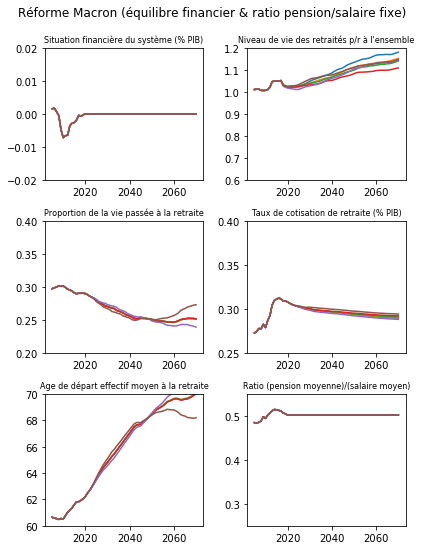

In [6]:
Ps=0
Ts=0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
pl.figure(figsize=(6,8))
pl.suptitle(u'Réforme Macron (équilibre financier & ratio pension/salaire fixe)',fontsize=12)
            
Ts,Ps,As = simulateur.calcule_Ts_Ps_As_fixant_Ps_Ts_S(Ps,Ts)
S,RNV,REV = simulateur.calcule_S_RNV_REV(Ts,Ps,As)
    
analyse = SimulateurAnalyse(simulateur, "fig/")
analyse.graphiques(Ts,Ps,As, S,RNV,REV)

In [7]:
print("Maintien du rapport pension moyenne / salaire moyen")
analyse.affiche_solutions_simulateur_COR(Ts,Ps,As)

Maintien du rapport pension moyenne / salaire moyen
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:        
62.2
63.5
64.8
67.0
68.5
69.6
70.1

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
28.9

Pension:    
50.2
50.2
50.2
50.2
50.2
50.2
50.2



Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:        
62.2
63.5
64.8
67.0
68.5
69.7
70.1

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
29.0

Pension:    
50.2
50.2
50.2
50.2
50.2
50.2
50.2



Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:        
62.2
63.5
64.8
67.0
68.5
69.6
70.1

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.2
29.1

Pension:    
50.2
50.2
50.2
50.2
50.2
50.2
50.2



Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:        
62.2
63.5
64.8
67.0
68.5
69.6
70.0

Cotisation: 
30.8
30.2
30.0
29.7
29.5
29.3
29.2

Pension:    
50.2
50.2
50.2
50.2
50.2
50.2
50.2



Scenario 5 :  Hausse des salaires: +1,8%/

## Pilotage 3 : calcul à cotisations et niveau de vie défini

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau de vie des retraités par rapport à l'ensemble de la population,
* le taux de cotisations. 


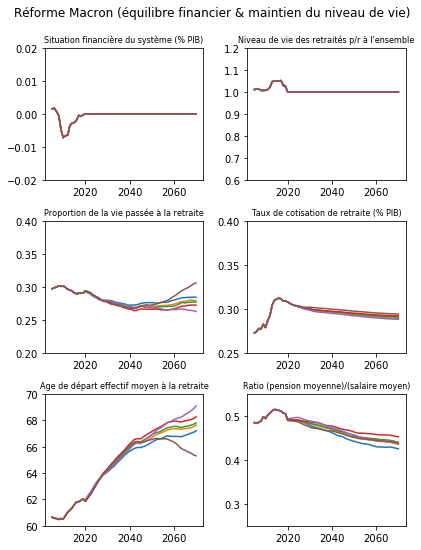

In [8]:
Ts=0 # Utilise le taux de cotisations du COR
RNV=1.0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
            
Ts,Ps,As = simulateur.calcule_Ts_Ps_As_fixant_Ts_RNV_S(Ts,RNV)
S,RNV,REV = simulateur.calcule_S_RNV_REV(Ts,Ps,As)
    
pl.figure(figsize=(6,8))
pl.suptitle(u'Réforme Macron (équilibre financier & maintien du niveau de vie)',fontsize=12)
analyse = SimulateurAnalyse(simulateur, "fig/")
analyse.graphiques(Ts,Ps,As, S,RNV,REV)
analyse.mysavefig("macron_niveau_de_vie")

In [9]:
print("Maintien du niveau de vie")
analyse.affiche_solutions_simulateur_COR(Ts,Ps,As)

Maintien du niveau de vie
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:        
61.8
63.1
64.1
65.7
66.3
66.8
67.2

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
28.9

Pension:    
49.0
48.9
47.9
46.2
44.3
43.0
42.5



Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:        
61.9
63.2
64.2
65.9
66.7
67.4
67.7

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
29.0

Pension:    
49.0
49.0
48.3
47.0
45.2
44.3
43.6



Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:        
61.9
63.2
64.2
66.0
66.9
67.6
67.8

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.2
29.1

Pension:    
49.0
49.0
48.4
47.0
45.7
44.8
44.0



Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:        
61.9
63.2
64.4
66.2
67.2
67.9
68.3

Cotisation: 
30.8
30.2
30.0
29.7
29.5
29.3
29.2

Pension:    
49.2
49.1
48.7
47.7
46.4
45.8
45.3



Scenario 5 :  Hausse des salaires: +1,8%/an, Taux de chômage: 4.5%


## Pilotage 4 : calcul à cotisations et âge définis

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* un âge de départ à la retraite donné,
* un taux de cotisations donné.


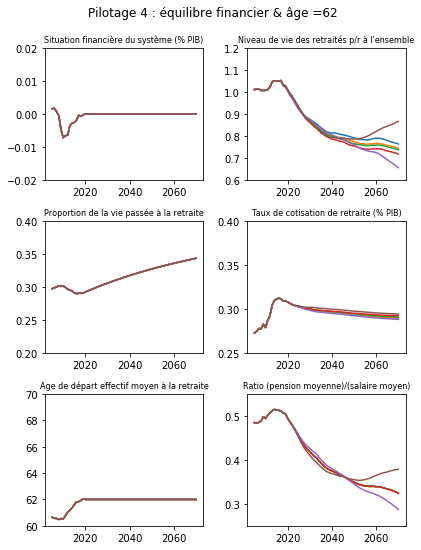

In [10]:
Acible = 62 # Age de départ à la retraite

simulateur = SimulateurRetraites('retraites/fileProjection.json')
            
Ts,Ps,As = simulateur.calcule_Ts_Ps_As_fixant_As_Ts_S(Acible) 
S,RNV,REV = simulateur.calcule_S_RNV_REV(Ts,Ps,As)
    
pl.figure(figsize=(6,8))
pl.suptitle(u'Pilotage 4 : équilibre financier & âge =%d'% (Acible),fontsize=12)
analyse = SimulateurAnalyse(simulateur, "fig/")
analyse.graphiques(Ts,Ps,As, S,RNV,REV)
analyse.mysavefig("pilotage4_age")

In [11]:
print("Pilotage 4 : age = %d ans" % (Acible))
analyse.affiche_solutions_simulateur_COR(Ts,Ps,As)

Pilotage 4 : age = 62 ans
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
28.9

Pension:    
49.5
45.5
41.9
37.6
35.0
34.0
32.4



Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
29.0

Pension:    
49.5
45.5
41.9
37.5
34.9
33.9
32.4



Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.2
29.1

Pension:    
49.5
45.4
41.9
37.5
34.9
33.9
32.4



Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.5
29.3
29.2

Pension:    
49.5
45.4
41.9
37.5
34.9
33.9
32.4



Scenario 5 :  Hausse des salaires: +1,8%/an, Taux de chômage: 4.5%


## Articles mediapart

Données et figure pour article 2


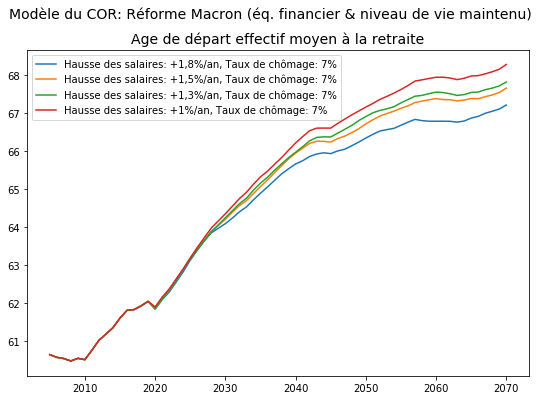

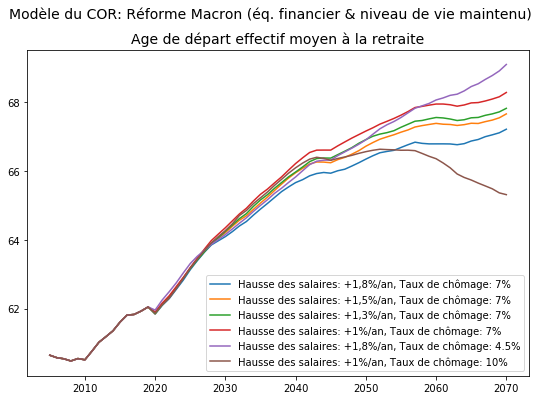

In [12]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
print("Données et figure pour article 2")

Ts,Ps,As = simulateur.calcule_Ts_Ps_As_fixant_Ts_RNV_S(0)
S,RNV,REV = simulateur.calcule_S_RNV_REV(Ts,Ps,As)
    
analyse = SimulateurAnalyse(simulateur, "fig/")
pl.figure(figsize=(9,6))
analyse.graphique(As,"A",14,[],True,range(1,5))
pl.suptitle(u"Modèle du COR: Réforme Macron (éq. financier & niveau de vie maintenu)",fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_68_ans")

pl.figure(figsize=(9,6))
analyse.graphique(As,"A",14,[],True)
pl.suptitle(u"Modèle du COR: Réforme Macron (éq. financier & niveau de vie maintenu)",fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_68_ans_tout")

In [13]:
print("Réforme Macron, Maintien du niveau de vie")
analyse.affiche_solutions_simulateur_COR(Ts,Ps,As)

Réforme Macron, Maintien du niveau de vie
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:        
61.8
63.1
64.1
65.7
66.3
66.8
67.2

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
28.9

Pension:    
49.0
48.9
47.9
46.2
44.3
43.0
42.5



Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:        
61.9
63.2
64.2
65.9
66.7
67.4
67.7

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
29.0

Pension:    
49.0
49.0
48.3
47.0
45.2
44.3
43.6



Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:        
61.9
63.2
64.2
66.0
66.9
67.6
67.8

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.2
29.1

Pension:    
49.0
49.0
48.4
47.0
45.7
44.8
44.0



Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:        
61.9
63.2
64.4
66.2
67.2
67.9
68.3

Cotisation: 
30.8
30.2
30.0
29.7
29.5
29.3
29.2

Pension:    
49.2
49.1
48.7
47.7
46.4
45.8
45.3



Scenario 5 :  Hausse des salaires: +1,8%/an, Taux d

Données et figures pour article 3


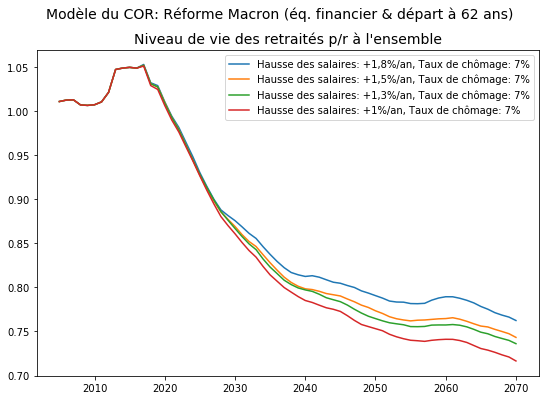

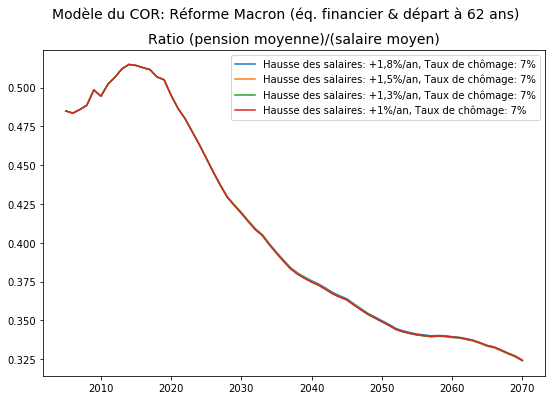

In [14]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
print("Données et figures pour article 3")

Ts,Ps,As = simulateur.calcule_Ts_Ps_As_fixant_As_Ts_S(62) 
S,RNV,REV = simulateur.calcule_S_RNV_REV(Ts,Ps,As)

analyse = SimulateurAnalyse(simulateur, "fig/")
titre=u"Modèle du COR: Réforme Macron (éq. financier & départ à 62 ans)"

pl.figure(figsize=(9,6))
analyse.graphique(RNV,"RNV",14,[],True,range(1,5))
pl.suptitle(titre,fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_62_ans_nv")

pl.figure(figsize=(9,6))
analyse.graphique(Ps,"P",14,[],True,range(1,5))
pl.suptitle(titre,fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_62_ans_p")

In [15]:
print("Réforme Macron, Départ à 62 ans")
analyse.affiche_solutions_simulateur_COR(Ts,Ps,As)
print("\nEvolution du niveau de vie:")
analyse.affiche_variable(RNV)
print("\nEvolution du ratio pension/salaire:")
analyse.affiche_variable(Ps)

Réforme Macron, Départ à 62 ans
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
28.9

Pension:    
49.5
45.5
41.9
37.6
35.0
34.0
32.4



Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.1
29.0

Pension:    
49.5
45.5
41.9
37.5
34.9
33.9
32.4



Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.4
29.2
29.1

Pension:    
49.5
45.4
41.9
37.5
34.9
33.9
32.4



Scenario 4 :  Hausse des salaires: +1%/an, Taux de chômage: 7%
Age:        
62.0
62.0
62.0
62.0
62.0
62.0
62.0

Cotisation: 
30.8
30.2
30.0
29.7
29.5
29.3
29.2

Pension:    
49.5
45.4
41.9
37.5
34.9
33.9
32.4



Scenario 5 :  Hausse des salaires: +1,8%/an, Taux de chômage: